In [1]:
%pylab inline

import numpy as np
import scipy
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import optimize
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


# Introduce Mathematical Optimization

https://scipy-lectures.org/advanced/mathematical_optimization/index.html

## Convex VS  Non-Convex Optimization

Convex function이란 오직 단 하나의 global minimum값을 갖고 있습니다.<br>
Non convex function의 경우 local minima (global minimum값보다는 더 깊지 않은 것) 가 존재합니다.

또한 아래의 선에서 한 점을 찍고 다른 곳에 다른 한 점을 찍은후 직선을 그었을때 걸리는 부분이 있으면 non-convex라고 볼 수 있습니다.

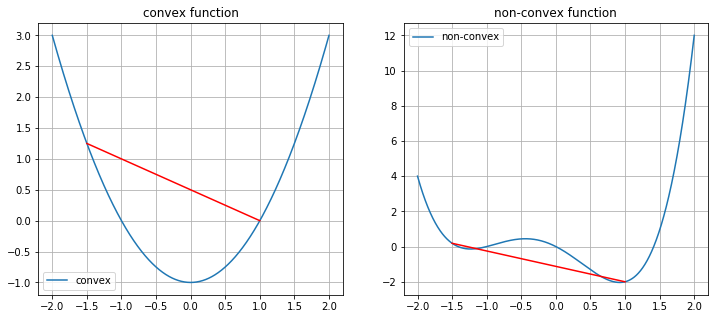

In [2]:
def convex(x):
    return x**2-1

def non_convex(x):
    return x**4 + x**3 -2*x**2 - 2*x


x = np.linspace(-2, 2, 1000)
line_x = np.array([-1.5, 1.0])


fig, plots = subplots(1, 2, figsize=(12, 5))
sns.lineplot(x, convex(x), ax=plots[0], label='convex')
sns.lineplot(x, non_convex(x), ax=plots[1], label='non-convex')
sns.lineplot(line_x, convex(line_x), ax=plots[0], color='red')
sns.lineplot(line_x, non_convex(line_x), ax=plots[1], color='red')
plots[0].set_title('convex function')
plots[1].set_title('non-convex function')
plots[0].grid()
plots[1].grid()

## Smooth and Non-Smooth Problems

아래 smooth의 경우 모든 지점에서 gradient가 존재하며 continuous function이기 때문에 <br>
smooth function을 optimization하는 것이 non-smooth 문제보다 더 쉽습니다.

반명에 직선형태로 떨어지는 문제에서는 linear programming으로 문제를 해결하면 아주 정확한 optimization값을 알아 낼 수 있습니다.

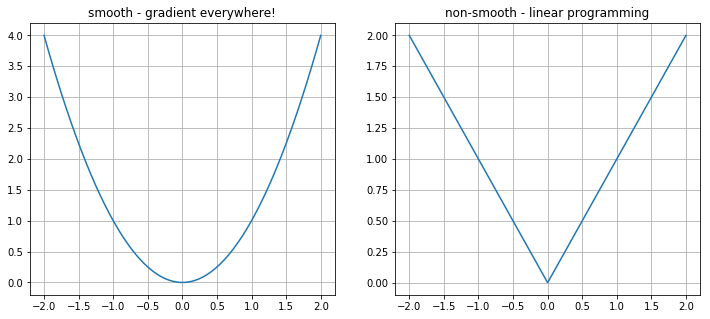

In [3]:
def smooth(x):
    return x**2

def non_smooth(x):
    return abs(x)

x = np.linspace(-2, 2, 1000)

fig, plots = subplots(1, 2, figsize=(12, 5))
sns.lineplot(x, smooth(x), ax=plots[0])
sns.lineplot(x, non_smooth(x), ax=plots[1])
plots[0].set_title('smooth - gradient everywhere!')
plots[1].set_title('non-smooth - linear programming')
plots[0].grid()
plots[1].grid()

# Code Snippets

## Global Optimization


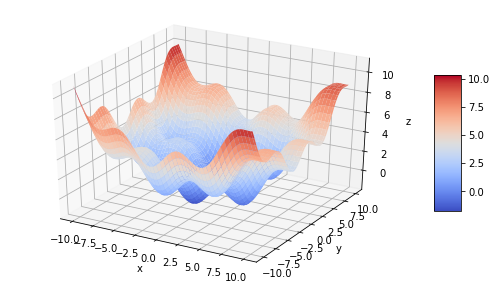

In [227]:
def fm(data, debug=True):
    x = data[0]
    y = data[1]
    z = (np.sin(x) + 0.05 * x**2 +
         np.sin(y) + 0.05 * y**2)
    if debug:
        print(f'x:{x:>8.4} | y:{y:>8.4} | z:{z:>8.4}')
    return z

def visualize_3d(func, x, y, **kwargs):
    X, Y = np.meshgrid(x, y)
    Z = func((X, Y), **kwargs)

    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.grid()
    
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
visualize_3d(fm, x, y, debug=False)

In [228]:
opt1 = optimize.brute(fm, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
print('optimized:', opt1)

x:   -10.0 | y:   -10.0 | z:   11.09
x:   -10.0 | y:   -10.0 | z:   11.09
x:   -10.0 | y:    -9.9 | z:    10.9
x:   -10.0 | y:    -9.8 | z:   10.71
x:   -10.0 | y:    -9.7 | z:   10.52
x:   -10.0 | y:    -9.6 | z:   10.33
x:   -10.0 | y:    -9.5 | z:   10.13
x:   -10.0 | y:    -9.4 | z:   9.937
x:   -10.0 | y:    -9.3 | z:   9.744
x:   -10.0 | y:    -9.2 | z:   9.553
x:   -10.0 | y:    -9.1 | z:   9.365
x:   -10.0 | y:    -9.0 | z:   9.182
x:   -10.0 | y:    -8.9 | z:   9.004
x:   -10.0 | y:    -8.8 | z:   8.831
x:   -10.0 | y:    -8.7 | z:   8.666
x:   -10.0 | y:    -8.6 | z:   8.508
x:   -10.0 | y:    -8.5 | z:   8.358
x:   -10.0 | y:    -8.4 | z:   8.217
x:   -10.0 | y:    -8.3 | z:   8.086
x:   -10.0 | y:    -8.2 | z:   7.965
x:   -10.0 | y:    -8.1 | z:   7.855
x:   -10.0 | y:    -8.0 | z:   7.755
x:   -10.0 | y:    -7.9 | z:   7.666
x:   -10.0 | y:    -7.8 | z:   7.587
x:   -10.0 | y:    -7.7 | z:    7.52
x:   -10.0 | y:    -7.6 | z:   7.464
x:   -10.0 | y:    -7.5 | z:   7.419
x

x:    -8.9 | y:     6.1 | z:   5.138
x:    -8.9 | y:     6.2 | z:   5.298
x:    -8.9 | y:     6.3 | z:   5.461
x:    -8.9 | y:     6.4 | z:   5.624
x:    -8.9 | y:     6.5 | z:   5.787
x:    -8.9 | y:     6.6 | z:   5.949
x:    -8.9 | y:     6.7 | z:   6.109
x:    -8.9 | y:     6.8 | z:   6.266
x:    -8.9 | y:     6.9 | z:   6.418
x:    -8.9 | y:     7.0 | z:   6.566
x:    -8.9 | y:     7.1 | z:   6.709
x:    -8.9 | y:     7.2 | z:   6.845
x:    -8.9 | y:     7.3 | z:   6.974
x:    -8.9 | y:     7.4 | z:   7.096
x:    -8.9 | y:     7.5 | z:    7.21
x:    -8.9 | y:     7.6 | z:   7.315
x:    -8.9 | y:     7.7 | z:   7.412
x:    -8.9 | y:     7.8 | z:     7.5
x:    -8.9 | y:     7.9 | z:   7.579
x:    -8.9 | y:     8.0 | z:   7.649
x:    -8.9 | y:     8.1 | z:    7.71
x:    -8.9 | y:     8.2 | z:   7.762
x:    -8.9 | y:     8.3 | z:   7.806
x:    -8.9 | y:     8.4 | z:   7.842
x:    -8.9 | y:     8.5 | z:    7.87
x:    -8.9 | y:     8.6 | z:   7.892
x:    -8.9 | y:     8.7 | z:   7.907
x

x:    -7.9 | y:     5.1 | z:   2.496
x:    -7.9 | y:     5.2 | z:    2.59
x:    -7.9 | y:     5.3 | z:   2.694
x:    -7.9 | y:     5.4 | z:   2.807
x:    -7.9 | y:     5.5 | z:   2.929
x:    -7.9 | y:     5.6 | z:   3.058
x:    -7.9 | y:     5.7 | z:   3.195
x:    -7.9 | y:     5.8 | z:   3.339
x:    -7.9 | y:     5.9 | z:   3.488
x:    -7.9 | y:     6.0 | z:   3.642
x:    -7.9 | y:     6.1 | z:     3.8
x:    -7.9 | y:     6.2 | z:    3.96
x:    -7.9 | y:     6.3 | z:   4.123
x:    -7.9 | y:     6.4 | z:   4.286
x:    -7.9 | y:     6.5 | z:   4.449
x:    -7.9 | y:     6.6 | z:   4.611
x:    -7.9 | y:     6.7 | z:   4.771
x:    -7.9 | y:     6.8 | z:   4.928
x:    -7.9 | y:     6.9 | z:    5.08
x:    -7.9 | y:     7.0 | z:   5.229
x:    -7.9 | y:     7.1 | z:   5.371
x:    -7.9 | y:     7.2 | z:   5.507
x:    -7.9 | y:     7.3 | z:   5.636
x:    -7.9 | y:     7.4 | z:   5.758
x:    -7.9 | y:     7.5 | z:   5.872
x:    -7.9 | y:     7.6 | z:   5.977
x:    -7.9 | y:     7.7 | z:   6.074
x

x:    -6.9 | y:     4.0 | z:   1.845
x:    -6.9 | y:     4.1 | z:   1.824
x:    -6.9 | y:     4.2 | z:   1.812
x:    -6.9 | y:     4.3 | z:    1.81
x:    -6.9 | y:     4.4 | z:   1.818
x:    -6.9 | y:     4.5 | z:   1.837
x:    -6.9 | y:     4.6 | z:   1.866
x:    -6.9 | y:     4.7 | z:   1.907
x:    -6.9 | y:     4.8 | z:   1.958
x:    -6.9 | y:     4.9 | z:    2.02
x:    -6.9 | y:     5.0 | z:   2.093
x:    -6.9 | y:     5.1 | z:   2.177
x:    -6.9 | y:     5.2 | z:   2.271
x:    -6.9 | y:     5.3 | z:   2.374
x:    -6.9 | y:     5.4 | z:   2.487
x:    -6.9 | y:     5.5 | z:   2.609
x:    -6.9 | y:     5.6 | z:   2.739
x:    -6.9 | y:     5.7 | z:   2.876
x:    -6.9 | y:     5.8 | z:   3.019
x:    -6.9 | y:     5.9 | z:   3.169
x:    -6.9 | y:     6.0 | z:   3.323
x:    -6.9 | y:     6.1 | z:    3.48
x:    -6.9 | y:     6.2 | z:   3.641
x:    -6.9 | y:     6.3 | z:   3.803
x:    -6.9 | y:     6.4 | z:   3.967
x:    -6.9 | y:     6.5 | z:    4.13
x:    -6.9 | y:     6.6 | z:   4.292
x

x:    -5.9 | y:     3.0 | z:   2.705
x:    -5.9 | y:     3.1 | z:   2.636
x:    -5.9 | y:     3.2 | z:   2.568
x:    -5.9 | y:     3.3 | z:   2.501
x:    -5.9 | y:     3.4 | z:   2.437
x:    -5.9 | y:     3.5 | z:   2.376
x:    -5.9 | y:     3.6 | z:    2.32
x:    -5.9 | y:     3.7 | z:   2.269
x:    -5.9 | y:     3.8 | z:   2.225
x:    -5.9 | y:     3.9 | z:   2.187
x:    -5.9 | y:     4.0 | z:   2.158
x:    -5.9 | y:     4.1 | z:   2.137
x:    -5.9 | y:     4.2 | z:   2.125
x:    -5.9 | y:     4.3 | z:   2.123
x:    -5.9 | y:     4.4 | z:   2.131
x:    -5.9 | y:     4.5 | z:   2.149
x:    -5.9 | y:     4.6 | z:   2.179
x:    -5.9 | y:     4.7 | z:   2.219
x:    -5.9 | y:     4.8 | z:    2.27
x:    -5.9 | y:     4.9 | z:   2.332
x:    -5.9 | y:     5.0 | z:   2.405
x:    -5.9 | y:     5.1 | z:   2.489
x:    -5.9 | y:     5.2 | z:   2.583
x:    -5.9 | y:     5.3 | z:   2.687
x:    -5.9 | y:     5.4 | z:     2.8
x:    -5.9 | y:     5.5 | z:   2.921
x:    -5.9 | y:     5.6 | z:   3.051
x

x:    -4.9 | y:     1.9 | z:    3.31
x:    -4.9 | y:     2.0 | z:   3.292
x:    -4.9 | y:     2.1 | z:   3.267
x:    -4.9 | y:     2.2 | z:   3.233
x:    -4.9 | y:     2.3 | z:   3.193
x:    -4.9 | y:     2.4 | z:   3.146
x:    -4.9 | y:     2.5 | z:   3.094
x:    -4.9 | y:     2.6 | z:   3.036
x:    -4.9 | y:     2.7 | z:   2.975
x:    -4.9 | y:     2.8 | z:    2.91
x:    -4.9 | y:     2.9 | z:   2.843
x:    -4.9 | y:     3.0 | z:   2.774
x:    -4.9 | y:     3.1 | z:   2.705
x:    -4.9 | y:     3.2 | z:   2.637
x:    -4.9 | y:     3.3 | z:    2.57
x:    -4.9 | y:     3.4 | z:   2.505
x:    -4.9 | y:     3.5 | z:   2.445
x:    -4.9 | y:     3.6 | z:   2.388
x:    -4.9 | y:     3.7 | z:   2.338
x:    -4.9 | y:     3.8 | z:   2.293
x:    -4.9 | y:     3.9 | z:   2.256
x:    -4.9 | y:     4.0 | z:   2.226
x:    -4.9 | y:     4.1 | z:   2.205
x:    -4.9 | y:     4.2 | z:   2.193
x:    -4.9 | y:     4.3 | z:   2.191
x:    -4.9 | y:     4.4 | z:   2.199
x:    -4.9 | y:     4.5 | z:   2.218
x

x:    -3.9 | y:     0.9 | z:   2.272
x:    -3.9 | y:     1.0 | z:    2.34
x:    -3.9 | y:     1.1 | z:     2.4
x:    -3.9 | y:     1.2 | z:   2.452
x:    -3.9 | y:     1.3 | z:   2.496
x:    -3.9 | y:     1.4 | z:   2.532
x:    -3.9 | y:     1.5 | z:   2.558
x:    -3.9 | y:     1.6 | z:   2.576
x:    -3.9 | y:     1.7 | z:   2.584
x:    -3.9 | y:     1.8 | z:   2.584
x:    -3.9 | y:     1.9 | z:   2.575
x:    -3.9 | y:     2.0 | z:   2.558
x:    -3.9 | y:     2.1 | z:   2.532
x:    -3.9 | y:     2.2 | z:   2.499
x:    -3.9 | y:     2.3 | z:   2.458
x:    -3.9 | y:     2.4 | z:   2.412
x:    -3.9 | y:     2.5 | z:   2.359
x:    -3.9 | y:     2.6 | z:   2.302
x:    -3.9 | y:     2.7 | z:    2.24
x:    -3.9 | y:     2.8 | z:   2.175
x:    -3.9 | y:     2.9 | z:   2.108
x:    -3.9 | y:     3.0 | z:   2.039
x:    -3.9 | y:     3.1 | z:    1.97
x:    -3.9 | y:     3.2 | z:   1.902
x:    -3.9 | y:     3.3 | z:   1.835
x:    -3.9 | y:     3.4 | z:   1.771
x:    -3.9 | y:     3.5 | z:    1.71
x

x:    -2.9 | y:    -0.2 | z:-0.01542
x:    -2.9 | y:    -0.1 | z: 0.08192
x:    -2.9 | y:     0.0 | z:  0.1813
x:    -2.9 | y:     0.1 | z:  0.2816
x:    -2.9 | y:     0.2 | z:  0.3819
x:    -2.9 | y:     0.3 | z:  0.4813
x:    -2.9 | y:     0.4 | z:  0.5787
x:    -2.9 | y:     0.5 | z:  0.6732
x:    -2.9 | y:     0.6 | z:  0.7639
x:    -2.9 | y:     0.7 | z:    0.85
x:    -2.9 | y:     0.8 | z:  0.9306
x:    -2.9 | y:     0.9 | z:   1.005
x:    -2.9 | y:     1.0 | z:   1.073
x:    -2.9 | y:     1.1 | z:   1.133
x:    -2.9 | y:     1.2 | z:   1.185
x:    -2.9 | y:     1.3 | z:   1.229
x:    -2.9 | y:     1.4 | z:   1.265
x:    -2.9 | y:     1.5 | z:   1.291
x:    -2.9 | y:     1.6 | z:   1.309
x:    -2.9 | y:     1.7 | z:   1.317
x:    -2.9 | y:     1.8 | z:   1.317
x:    -2.9 | y:     1.9 | z:   1.308
x:    -2.9 | y:     2.0 | z:   1.291
x:    -2.9 | y:     2.1 | z:   1.265
x:    -2.9 | y:     2.2 | z:   1.232
x:    -2.9 | y:     2.3 | z:   1.191
x:    -2.9 | y:     2.4 | z:   1.145
x

x:    -1.9 | y:    -1.2 | z:  -1.626
x:    -1.9 | y:    -1.1 | z:  -1.597
x:    -1.9 | y:    -1.0 | z:  -1.557
x:    -1.9 | y:    -0.9 | z:  -1.509
x:    -1.9 | y:    -0.8 | z:  -1.451
x:    -1.9 | y:    -0.7 | z:  -1.386
x:    -1.9 | y:    -0.6 | z:  -1.312
x:    -1.9 | y:    -0.5 | z:  -1.233
x:    -1.9 | y:    -0.4 | z:  -1.147
x:    -1.9 | y:    -0.3 | z:  -1.057
x:    -1.9 | y:    -0.2 | z: -0.9625
x:    -1.9 | y:    -0.1 | z: -0.8651
x:    -1.9 | y:     0.0 | z: -0.7658
x:    -1.9 | y:     0.1 | z: -0.6655
x:    -1.9 | y:     0.2 | z: -0.5651
x:    -1.9 | y:     0.3 | z: -0.4658
x:    -1.9 | y:     0.4 | z: -0.3684
x:    -1.9 | y:     0.5 | z: -0.2739
x:    -1.9 | y:     0.6 | z: -0.1832
x:    -1.9 | y:     0.7 | z:-0.09708
x:    -1.9 | y:     0.8 | z:-0.01644
x:    -1.9 | y:     0.9 | z: 0.05803
x:    -1.9 | y:     1.0 | z:  0.1257
x:    -1.9 | y:     1.1 | z:  0.1859
x:    -1.9 | y:     1.2 | z:  0.2382
x:    -1.9 | y:     1.3 | z:  0.2823
x:    -1.9 | y:     1.4 | z:  0.3176
x

x:    -0.9 | y:    -2.3 | z:  -1.224
x:    -0.9 | y:    -2.2 | z:  -1.309
x:    -0.9 | y:    -2.1 | z:  -1.386
x:    -0.9 | y:    -2.0 | z:  -1.452
x:    -0.9 | y:    -1.9 | z:  -1.509
x:    -0.9 | y:    -1.8 | z:  -1.555
x:    -0.9 | y:    -1.7 | z:   -1.59
x:    -0.9 | y:    -1.6 | z:  -1.614
x:    -0.9 | y:    -1.5 | z:  -1.628
x:    -0.9 | y:    -1.4 | z:   -1.63
x:    -0.9 | y:    -1.3 | z:  -1.622
x:    -0.9 | y:    -1.2 | z:  -1.603
x:    -0.9 | y:    -1.1 | z:  -1.574
x:    -0.9 | y:    -1.0 | z:  -1.534
x:    -0.9 | y:    -0.9 | z:  -1.486
x:    -0.9 | y:    -0.8 | z:  -1.428
x:    -0.9 | y:    -0.7 | z:  -1.363
x:    -0.9 | y:    -0.6 | z:  -1.289
x:    -0.9 | y:    -0.5 | z:   -1.21
x:    -0.9 | y:    -0.4 | z:  -1.124
x:    -0.9 | y:    -0.3 | z:  -1.034
x:    -0.9 | y:    -0.2 | z: -0.9395
x:    -0.9 | y:    -0.1 | z: -0.8422
x:    -0.9 | y:     0.0 | z: -0.7428
x:    -0.9 | y:     0.1 | z: -0.6425
x:    -0.9 | y:     0.2 | z: -0.5422
x:    -0.9 | y:     0.3 | z: -0.4428
x

x:     0.1 | y:    -3.3 | z:  0.8026
x:     0.1 | y:    -3.2 | z:  0.6707
x:     0.1 | y:    -3.1 | z:  0.5393
x:     0.1 | y:    -3.0 | z:  0.4092
x:     0.1 | y:    -2.9 | z:  0.2816
x:     0.1 | y:    -2.8 | z:  0.1573
x:     0.1 | y:    -2.7 | z: 0.03745
x:     0.1 | y:    -2.6 | z:-0.07717
x:     0.1 | y:    -2.5 | z: -0.1856
x:     0.1 | y:    -2.4 | z: -0.2871
x:     0.1 | y:    -2.3 | z: -0.3809
x:     0.1 | y:    -2.2 | z: -0.4662
x:     0.1 | y:    -2.1 | z: -0.5424
x:     0.1 | y:    -2.0 | z:  -0.609
x:     0.1 | y:    -1.9 | z: -0.6655
x:     0.1 | y:    -1.8 | z: -0.7115
x:     0.1 | y:    -1.7 | z: -0.7468
x:     0.1 | y:    -1.6 | z: -0.7712
x:     0.1 | y:    -1.5 | z: -0.7847
x:     0.1 | y:    -1.4 | z: -0.7871
x:     0.1 | y:    -1.3 | z: -0.7787
x:     0.1 | y:    -1.2 | z: -0.7597
x:     0.1 | y:    -1.1 | z: -0.7304
x:     0.1 | y:    -1.0 | z: -0.6911
x:     0.1 | y:    -0.9 | z: -0.6425
x:     0.1 | y:    -0.8 | z:  -0.585
x:     0.1 | y:    -0.7 | z: -0.5194
x

x:     1.1 | y:    -4.4 | z:   2.871
x:     1.1 | y:    -4.3 | z:   2.792
x:     1.1 | y:    -4.2 | z:   2.705
x:     1.1 | y:    -4.1 | z:    2.61
x:     1.1 | y:    -4.0 | z:   2.509
x:     1.1 | y:    -3.9 | z:     2.4
x:     1.1 | y:    -3.8 | z:   2.286
x:     1.1 | y:    -3.7 | z:   2.166
x:     1.1 | y:    -3.6 | z:   2.042
x:     1.1 | y:    -3.5 | z:   1.915
x:     1.1 | y:    -3.4 | z:   1.785
x:     1.1 | y:    -3.3 | z:   1.654
x:     1.1 | y:    -3.2 | z:   1.522
x:     1.1 | y:    -3.1 | z:   1.391
x:     1.1 | y:    -3.0 | z:   1.261
x:     1.1 | y:    -2.9 | z:   1.133
x:     1.1 | y:    -2.8 | z:   1.009
x:     1.1 | y:    -2.7 | z:  0.8888
x:     1.1 | y:    -2.6 | z:  0.7742
x:     1.1 | y:    -2.5 | z:  0.6657
x:     1.1 | y:    -2.4 | z:  0.5642
x:     1.1 | y:    -2.3 | z:  0.4705
x:     1.1 | y:    -2.2 | z:  0.3852
x:     1.1 | y:    -2.1 | z:   0.309
x:     1.1 | y:    -2.0 | z:  0.2424
x:     1.1 | y:    -1.9 | z:  0.1859
x:     1.1 | y:    -1.8 | z:  0.1399
x

x:     2.1 | y:    -4.0 | z:   2.641
x:     2.1 | y:    -3.9 | z:   2.532
x:     2.1 | y:    -3.8 | z:   2.418
x:     2.1 | y:    -3.7 | z:   2.298
x:     2.1 | y:    -3.6 | z:   2.174
x:     2.1 | y:    -3.5 | z:   2.047
x:     2.1 | y:    -3.4 | z:   1.917
x:     2.1 | y:    -3.3 | z:   1.786
x:     2.1 | y:    -3.2 | z:   1.654
x:     2.1 | y:    -3.1 | z:   1.523
x:     2.1 | y:    -3.0 | z:   1.393
x:     2.1 | y:    -2.9 | z:   1.265
x:     2.1 | y:    -2.8 | z:   1.141
x:     2.1 | y:    -2.7 | z:   1.021
x:     2.1 | y:    -2.6 | z:  0.9062
x:     2.1 | y:    -2.5 | z:  0.7977
x:     2.1 | y:    -2.4 | z:  0.6962
x:     2.1 | y:    -2.3 | z:  0.6025
x:     2.1 | y:    -2.2 | z:  0.5172
x:     2.1 | y:    -2.1 | z:   0.441
x:     2.1 | y:    -2.0 | z:  0.3744
x:     2.1 | y:    -1.9 | z:  0.3179
x:     2.1 | y:    -1.8 | z:  0.2719
x:     2.1 | y:    -1.7 | z:  0.2365
x:     2.1 | y:    -1.6 | z:  0.2121
x:     2.1 | y:    -1.5 | z:  0.1987
x:     2.1 | y:    -1.4 | z:  0.1963
x

x:     3.1 | y:    -0.7 | z:-0.09764
x:     3.1 | y:    -0.6 | z:-0.02456
x:     3.1 | y:    -0.5 | z: 0.05516
x:     3.1 | y:    -0.4 | z:  0.1407
x:     3.1 | y:    -0.3 | z:  0.2311
x:     3.1 | y:    -0.2 | z:  0.3254
x:     3.1 | y:    -0.1 | z:  0.4227
x:     3.1 | y:     0.0 | z:  0.5221
x:     3.1 | y:     0.1 | z:  0.6224
x:     3.1 | y:     0.2 | z:  0.7227
x:     3.1 | y:     0.3 | z:  0.8221
x:     3.1 | y:     0.4 | z:  0.9195
x:     3.1 | y:     0.5 | z:   1.014
x:     3.1 | y:     0.6 | z:   1.105
x:     3.1 | y:     0.7 | z:   1.191
x:     3.1 | y:     0.8 | z:   1.271
x:     3.1 | y:     0.9 | z:   1.346
x:     3.1 | y:     1.0 | z:   1.414
x:     3.1 | y:     1.1 | z:   1.474
x:     3.1 | y:     1.2 | z:   1.526
x:     3.1 | y:     1.3 | z:    1.57
x:     3.1 | y:     1.4 | z:   1.606
x:     3.1 | y:     1.5 | z:   1.632
x:     3.1 | y:     1.6 | z:    1.65
x:     3.1 | y:     1.7 | z:   1.658
x:     3.1 | y:     1.8 | z:   1.658
x:     3.1 | y:     1.9 | z:   1.649
x

x:     4.1 | y:    -2.4 | z: -0.3652
x:     4.1 | y:    -2.3 | z:  -0.459
x:     4.1 | y:    -2.2 | z: -0.5443
x:     4.1 | y:    -2.1 | z: -0.6205
x:     4.1 | y:    -2.0 | z: -0.6871
x:     4.1 | y:    -1.9 | z: -0.7436
x:     4.1 | y:    -1.8 | z: -0.7896
x:     4.1 | y:    -1.7 | z: -0.8249
x:     4.1 | y:    -1.6 | z: -0.8494
x:     4.1 | y:    -1.5 | z: -0.8628
x:     4.1 | y:    -1.4 | z: -0.8652
x:     4.1 | y:    -1.3 | z: -0.8568
x:     4.1 | y:    -1.2 | z: -0.8378
x:     4.1 | y:    -1.1 | z: -0.8085
x:     4.1 | y:    -1.0 | z: -0.7692
x:     4.1 | y:    -0.9 | z: -0.7206
x:     4.1 | y:    -0.8 | z: -0.6631
x:     4.1 | y:    -0.7 | z: -0.5975
x:     4.1 | y:    -0.6 | z: -0.5244
x:     4.1 | y:    -0.5 | z: -0.4447
x:     4.1 | y:    -0.4 | z: -0.3592
x:     4.1 | y:    -0.3 | z: -0.2688
x:     4.1 | y:    -0.2 | z: -0.1744
x:     4.1 | y:    -0.1 | z:-0.07711
x:     4.1 | y:     0.0 | z: 0.02222
x:     4.1 | y:     0.1 | z:  0.1226
x:     4.1 | y:     0.2 | z:  0.2229
x

x:     5.3 | y:     1.2 | z:   1.576
x:     5.3 | y:     1.3 | z:    1.62
x:     5.3 | y:     1.4 | z:   1.656
x:     5.3 | y:     1.5 | z:   1.682
x:     5.3 | y:     1.6 | z:     1.7
x:     5.3 | y:     1.7 | z:   1.708
x:     5.3 | y:     1.8 | z:   1.708
x:     5.3 | y:     1.9 | z:   1.699
x:     5.3 | y:     2.0 | z:   1.682
x:     5.3 | y:     2.1 | z:   1.656
x:     5.3 | y:     2.2 | z:   1.623
x:     5.3 | y:     2.3 | z:   1.582
x:     5.3 | y:     2.4 | z:   1.536
x:     5.3 | y:     2.5 | z:   1.483
x:     5.3 | y:     2.6 | z:   1.426
x:     5.3 | y:     2.7 | z:   1.364
x:     5.3 | y:     2.8 | z:   1.299
x:     5.3 | y:     2.9 | z:   1.232
x:     5.3 | y:     3.0 | z:   1.163
x:     5.3 | y:     3.1 | z:   1.094
x:     5.3 | y:     3.2 | z:   1.026
x:     5.3 | y:     3.3 | z:   0.959
x:     5.3 | y:     3.4 | z:  0.8947
x:     5.3 | y:     3.5 | z:  0.8339
x:     5.3 | y:     3.6 | z:  0.7777
x:     5.3 | y:     3.7 | z:  0.7269
x:     5.3 | y:     3.8 | z:  0.6824
x

x:     6.5 | y:    10.0 | z:   6.784
x:     6.6 | y:   -10.0 | z:   8.034
x:     6.6 | y:    -9.9 | z:   7.848
x:     6.6 | y:    -9.8 | z:   7.658
x:     6.6 | y:    -9.7 | z:   7.466
x:     6.6 | y:    -9.6 | z:   7.272
x:     6.6 | y:    -9.5 | z:   7.077
x:     6.6 | y:    -9.4 | z:   6.883
x:     6.6 | y:    -9.3 | z:    6.69
x:     6.6 | y:    -9.2 | z:   6.499
x:     6.6 | y:    -9.1 | z:   6.311
x:     6.6 | y:    -9.0 | z:   6.127
x:     6.6 | y:    -8.9 | z:   5.949
x:     6.6 | y:    -8.8 | z:   5.777
x:     6.6 | y:    -8.7 | z:   5.611
x:     6.6 | y:    -8.6 | z:   5.453
x:     6.6 | y:    -8.5 | z:   5.304
x:     6.6 | y:    -8.4 | z:   5.163
x:     6.6 | y:    -8.3 | z:   5.032
x:     6.6 | y:    -8.2 | z:   4.911
x:     6.6 | y:    -8.1 | z:     4.8
x:     6.6 | y:    -8.0 | z:     4.7
x:     6.6 | y:    -7.9 | z:   4.611
x:     6.6 | y:    -7.8 | z:   4.533
x:     6.6 | y:    -7.7 | z:   4.466
x:     6.6 | y:    -7.6 | z:    4.41
x:     6.6 | y:    -7.5 | z:   4.364
x

x:     7.5 | y:     8.9 | z:   8.212
x:     7.5 | y:     9.0 | z:   8.213
x:     7.5 | y:     9.1 | z:    8.21
x:     7.5 | y:     9.2 | z:   8.205
x:     7.5 | y:     9.3 | z:   8.199
x:     7.5 | y:     9.4 | z:   8.193
x:     7.5 | y:     9.5 | z:   8.188
x:     7.5 | y:     9.6 | z:   8.184
x:     7.5 | y:     9.7 | z:   8.183
x:     7.5 | y:     9.8 | z:   8.186
x:     7.5 | y:     9.9 | z:   8.193
x:     7.5 | y:    10.0 | z:   8.206
x:     7.6 | y:   -10.0 | z:     9.4
x:     7.6 | y:    -9.9 | z:   9.214
x:     7.6 | y:    -9.8 | z:   9.024
x:     7.6 | y:    -9.7 | z:   8.832
x:     7.6 | y:    -9.6 | z:   8.638
x:     7.6 | y:    -9.5 | z:   8.444
x:     7.6 | y:    -9.4 | z:   8.249
x:     7.6 | y:    -9.3 | z:   8.056
x:     7.6 | y:    -9.2 | z:   7.865
x:     7.6 | y:    -9.1 | z:   7.677
x:     7.6 | y:    -9.0 | z:   7.494
x:     7.6 | y:    -8.9 | z:   7.315
x:     7.6 | y:    -8.8 | z:   7.143
x:     7.6 | y:    -8.7 | z:   6.977
x:     7.6 | y:    -8.6 | z:    6.82
x

x:     8.6 | y:     6.6 | z:   6.922
x:     8.6 | y:     6.7 | z:   7.082
x:     8.6 | y:     6.8 | z:   7.239
x:     8.6 | y:     6.9 | z:   7.391
x:     8.6 | y:     7.0 | z:   7.539
x:     8.6 | y:     7.1 | z:   7.682
x:     8.6 | y:     7.2 | z:   7.818
x:     8.6 | y:     7.3 | z:   7.947
x:     8.6 | y:     7.4 | z:   8.069
x:     8.6 | y:     7.5 | z:   8.183
x:     8.6 | y:     7.6 | z:   8.288
x:     8.6 | y:     7.7 | z:   8.385
x:     8.6 | y:     7.8 | z:   8.473
x:     8.6 | y:     7.9 | z:   8.552
x:     8.6 | y:     8.0 | z:   8.622
x:     8.6 | y:     8.1 | z:   8.683
x:     8.6 | y:     8.2 | z:   8.735
x:     8.6 | y:     8.3 | z:   8.779
x:     8.6 | y:     8.4 | z:   8.815
x:     8.6 | y:     8.5 | z:   8.843
x:     8.6 | y:     8.6 | z:   8.865
x:     8.6 | y:     8.7 | z:    8.88
x:     8.6 | y:     8.8 | z:   8.889
x:     8.6 | y:     8.9 | z:   8.894
x:     8.6 | y:     9.0 | z:   8.895
x:     8.6 | y:     9.1 | z:   8.892
x:     8.6 | y:     9.2 | z:   8.887
x

x:     9.8 | y:     4.6 | z:     4.5
x:     9.8 | y:     4.7 | z:    4.54
x:     9.8 | y:     4.8 | z:   4.591
x:     9.8 | y:     4.9 | z:   4.654
x:     9.8 | y:     5.0 | z:   4.727
x:     9.8 | y:     5.1 | z:    4.81
x:     9.8 | y:     5.2 | z:   4.904
x:     9.8 | y:     5.3 | z:   5.008
x:     9.8 | y:     5.4 | z:   5.121
x:     9.8 | y:     5.5 | z:   5.242
x:     9.8 | y:     5.6 | z:   5.372
x:     9.8 | y:     5.7 | z:   5.509
x:     9.8 | y:     5.8 | z:   5.653
x:     9.8 | y:     5.9 | z:   5.802
x:     9.8 | y:     6.0 | z:   5.956
x:     9.8 | y:     6.1 | z:   6.114
x:     9.8 | y:     6.2 | z:   6.274
x:     9.8 | y:     6.3 | z:   6.437
x:     9.8 | y:     6.4 | z:     6.6
x:     9.8 | y:     6.5 | z:   6.763
x:     9.8 | y:     6.6 | z:   6.925
x:     9.8 | y:     6.7 | z:   7.085
x:     9.8 | y:     6.8 | z:   7.242
x:     9.8 | y:     6.9 | z:   7.394
x:     9.8 | y:     7.0 | z:   7.543
x:     9.8 | y:     7.1 | z:   7.685
x:     9.8 | y:     7.2 | z:   7.821
x

In [229]:
print('opt1:', opt1)
fm(opt1, debug=False)

opt1: [-1.4 -1.4]


-1.7748994599769203

## Nelder-Mead Simplex algorithm (Local Optimization)


Simplex 알고리즘은 minimum값을 찾는데 사용는 unconstrained optimization algorithm입니다.<br>


- Gradient descent 방식을 사용하지 않기 때문에, minimum값을 찾는데까지 좀 느림
- Local optimization으로서 local minima에 빠지지 않기 위해서는 global optimization을 먼저 실행후 그 다음 실행
- simplex는 geomery에서 삼각형 형태를 갖은 다차원 형태를 의미

![](images/Nelder-Mead_Rosenbrock.gif) 
![](images/Nelder-Mead_Himmelblau.gif)


### 첫번째 예제

In [230]:
print('opt1 global optimization:', opt1)
print('opt2  local optimization:', opt2)

opt2 = optimize.fmin(fm, opt1, xtol=0.001, ftol=0.0001)

print('opt1 value:', fm(opt1, debug=False))
print('opt2 value:', fm(opt2, debug=False))

opt1 global optimization: [-1.4 -1.4]
opt2  local optimization: [-1.42785286  9.67878992]
x:    -1.4 | y:    -1.4 | z:  -1.775
x:   -1.47 | y:    -1.4 | z:  -1.774
x:    -1.4 | y:   -1.47 | z:  -1.774
x:   -1.33 | y:   -1.47 | z:   -1.77
x:  -1.435 | y:  -1.418 | z:  -1.776
x:  -1.435 | y:  -1.348 | z:  -1.772
x:  -1.409 | y:  -1.439 | z:  -1.775
x:  -1.444 | y:  -1.457 | z:  -1.775
x:  -1.433 | y:  -1.443 | z:  -1.776
x:  -1.459 | y:  -1.421 | z:  -1.775
x:  -1.421 | y:  -1.435 | z:  -1.776
x:  -1.424 | y:   -1.41 | z:  -1.776
x:   -1.43 | y:  -1.434 | z:  -1.776
x:  -1.417 | y:  -1.452 | z:  -1.775
x:   -1.43 | y:  -1.426 | z:  -1.776
x:   -1.44 | y:  -1.426 | z:  -1.776
x:  -1.426 | y:  -1.432 | z:  -1.776
x:  -1.426 | y:  -1.424 | z:  -1.776
x:   -1.43 | y:  -1.418 | z:  -1.776
x:  -1.427 | y:  -1.429 | z:  -1.776
x:  -1.432 | y:  -1.431 | z:  -1.776
x:  -1.427 | y:  -1.426 | z:  -1.776
x:  -1.424 | y:  -1.428 | z:  -1.776
x:  -1.429 | y:  -1.427 | z:  -1.776
x:  -1.429 | y:   -1.4

### 두번째 예제

Rosenbrock function을 minimize 하는 예제 입니다.

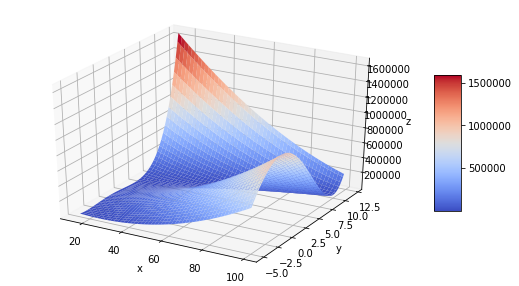

In [224]:
def rosen(data):
    x, y = data 
    return 100.*(x-y**2.)**2.0 + (1-x)**2.

x = np.linspace(15, 100, 100)
y = np.linspace(-5, 12, 100)
visualize_3d(rosen, x, y)

In [225]:
opt1 = np.array([20, 12], dtype=np.float16)
opt2 = optimize.fmin(rosen, opt1, xtol=0.001, ftol=0.0001)

print('opt1:', opt1)
print('opt2:', opt2)
print('before optimization:', round(rosen(opt1), 2))
print('after  optimization:', round(rosen(opt2), 2))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 80
         Function evaluations: 150
opt1: [20. 12.]
opt2: [0.9996845  0.99981935]
before optimization: 1537961.0
after  optimization: 0.0
